In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dataframe = pd.read_csv('churn_prediction.csv')

In [3]:
dataframe.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [4]:
dataframe.shape

(28382, 21)

## understand data(variable defination)
###### customer_id-customer id 
###### vintage - association for the customer with the bank in number of days 
######  city - city of customer
###### customer_nw_category - Net worh of customer (3:Low 2:Medium 1:High)
###### branch_code = branch code of customer

In [5]:
## understand the data, variables
dataframe.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

### variable identification and typecasting 

#### Integer data type 

In [6]:
# dataframe.select_dtypes('int64').columns
dataframe.dtypes[dataframe.dtypes=='int64']

customer_id             int64
vintage                 int64
age                     int64
customer_nw_category    int64
branch_code             int64
churn                   int64
dtype: object

In [7]:
### converting variables to categories
dataframe['churn'] = dataframe['churn'].astype('category')
dataframe['branch_code']=dataframe['branch_code'].astype('category')
dataframe['customer_nw_category'] =dataframe['customer_nw_category'].astype('category') 
dataframe.dtypes[dataframe.dtypes=='int64']

customer_id    int64
vintage        int64
age            int64
dtype: object

#### Float data type

In [8]:
dataframe.dtypes[dataframe.dtypes=='float64']

dependents                        float64
city                              float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object

In [9]:
dataframe.isna().sum()
dataframe['dependents'].fillna(0,inplace =True)

In [10]:
## converting dependents to int and city to categorical datatypes
dataframe['dependents'] = dataframe['dependents'].astype('Int64') 
dataframe['city'] =dataframe['city'].astype('category')
dataframe.dtypes[dataframe.dtypes=='Float64']

current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object

In [11]:
dataframe.dtypes[dataframe.dtypes=='object']

gender              object
occupation          object
last_transaction    object
dtype: object

In [12]:
dataframe['gender'] = dataframe['gender'].astype('category')
dataframe['occupation'] = dataframe['occupation'].astype('category')

In [13]:
dataframe.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                            category
dependents                           Int64
occupation                        category
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
last_transaction                    object
dtype: object

##### datetime variable 

In [14]:
### converting datatime obejct to actual datetime object
dataframe['last_transaction'] = pd.to_datetime(dataframe['last_transaction'])

In [15]:
### extracting new columns from last transaction column
dataframe['doy_ls_tran'] = dataframe['last_transaction'].dt.dayofyear
dataframe['woy_ls_tran'] = dataframe['last_transaction'].dt.weekofyear
dataframe['moy_ls_tran'] = dataframe['last_transaction'].dt.month
dataframe['dow_ls_tran'] = dataframe['last_transaction'].dt.dayofweek

In [16]:
dataframe.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
0,1,2101,66,Male,0,self_employed,187.0,2,755,1458.71,...,0.20,0.20,1458.71,1458.71,0,2019-05-21,141.0,21.0,5.0,1.0
1,2,2348,35,Male,0,self_employed,NaN,2,3214,5390.37,...,5486.27,100.56,6496.78,8787.61,0,2019-11-01,305.0,44.0,11.0,4.0
2,4,2194,31,Male,0,salaried,146.0,2,41,3913.16,...,6046.73,259.23,5006.28,5070.14,0,NaT,NaN,NaN,NaN,NaN
3,5,2329,90,NaN,0,self_employed,1020.0,2,582,2291.91,...,0.47,2143.33,2291.91,1669.79,1,2019-08-06,218.0,32.0,8.0,1.0
4,6,1579,42,Male,2,self_employed,1494.0,3,388,927.72,...,588.62,1538.06,1157.15,1677.16,1,2019-11-03,307.0,44.0,11.0,6.0


In [17]:
day_mapping = {0:'Sun',1:'Mon',2:'Tues',3:'Wed',4:'Thr',5:'Fri',6:"Sat"}
dataframe['daY_tran'] = dataframe['dow_ls_tran'].map(day_mapping)

In [18]:
dataframe.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran,daY_tran
0,1,2101,66,Male,0,self_employed,187.0,2,755,1458.71,...,0.20,1458.71,1458.71,0,2019-05-21,141.0,21.0,5.0,1.0,Mon
1,2,2348,35,Male,0,self_employed,NaN,2,3214,5390.37,...,100.56,6496.78,8787.61,0,2019-11-01,305.0,44.0,11.0,4.0,Thr
2,4,2194,31,Male,0,salaried,146.0,2,41,3913.16,...,259.23,5006.28,5070.14,0,NaT,NaN,NaN,NaN,NaN,NaN
3,5,2329,90,NaN,0,self_employed,1020.0,2,582,2291.91,...,2143.33,2291.91,1669.79,1,2019-08-06,218.0,32.0,8.0,1.0,Mon
4,6,1579,42,Male,2,self_employed,1494.0,3,388,927.72,...,1538.06,1157.15,1677.16,1,2019-11-03,307.0,44.0,11.0,6.0,Sat


In [19]:
dataframe.to_csv('stage3_churn_pred.csv',index=False)

In [20]:
dataframe.dtypes

customer_id                                int64
vintage                                    int64
age                                        int64
gender                                  category
dependents                                 Int64
occupation                              category
city                                    category
customer_nw_category                    category
branch_code                             category
current_balance                          float64
previous_month_end_balance               float64
average_monthly_balance_prevQ            float64
average_monthly_balance_prevQ2           float64
current_month_credit                     float64
previous_month_credit                    float64
current_month_debit                      float64
previous_month_debit                     float64
current_month_balance                    float64
previous_month_balance                   float64
churn                                   category
last_transaction    

### EDA

#### Univaraite Analysis

In [21]:
## Reading the transform data


In [22]:
data = pd.read_csv('stage3_churn_pred.csv')

In [23]:
## aggregating variable into group
customer_details = ['customer_id','age','vintage']
current_month = ['current_balance','current_month_credit',
                 'current_month_debit','current_month_balance']
prev_month = ['previous_month_end_balance','previous_month_credit',
             'previous_month_debit','previous_month_balance']
prev_quater = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_data = ['doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']

In [24]:
def UVA(data,var_group):
    """ Univariate_Analysis_numeric 
    takes a group of variable (int and float) and plot/print all the descriptives
    and propertiess along with KDE.
    
    Runs a loop:calculate all the description of i(th) variable and plot/print it.
    """
    
    size = len(var_group)
    plt.figure(figsize=(7*size,3),dpi =100)
    
    ## looping for each variable
    for j,i in enumerate(var_group):
        
        mini = round(data[i].min(),2)
        maxi = round(data[i].max(),2)
        mean = round(data[i].mean(),2)
        median = data[i].median()
        std_dev = round(data[i].std(),2)
        skew = round(data[i].skew(),2)
        kurt  = round(data[i].kurtosis(),2)
        
        ## one standard deviation
        first_std_dev = round(mean-std_dev,2),round(mean+std_dev,2)
        
        ## plotting the variable with every information
        plt.subplot(1,size,j+1)
        sns.kdeplot(data[i],shade=True)
        sns.lineplot(first_std_dev,[0,0],color='black',label='std_dev')
        sns.scatterplot((mini,maxi),[0,0],color='orange',label='min/max')
        sns.scatterplot(mean,[0],color='red',label='mean')
        sns.scatterplot(median,[0],color='blue',label = "meadian")
        plt.xlabel(f'{i}',fontsize =20)
        plt.ylabel('density')
        plt.title(f'first_std_dev:{first_std_dev}; kurtosis :{kurt};skew:{skew}; \nstd_dev:{std_dev} range: {mini}-{maxi} \n mean:{mean} median:{median} ')

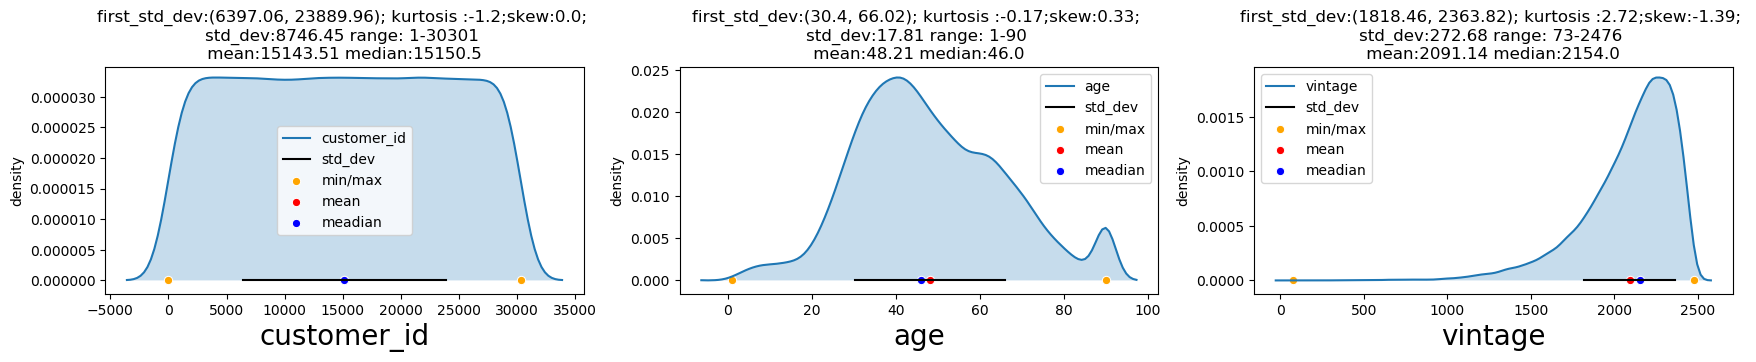

In [25]:
UVA(data,customer_details)

### Observation and summary of customer information
#### Customer_id
1. customer id has no distribution and relation to churn prediction we can drop this columns

#### age
1. median age = 46
2. Most of our customer are in age of (30 - 65)
3. skewness +.33 negligibly biased towards younger age
4. kurtosis :0.17 very less likely to have extreme/outlier values.
5 . There is peak in data near age 90 let's analysis this fruther.

#### vintage (no of days custumer with bank)
1. median no days a customer with bank:2154 (5 yr 9 months)
2. skewness :-1.39 most of the customer are connect with bank from a long time 5 yr (2000 - 2500) days
3. kurtosis: 2.72 very likely to have extreme/outliers values.

#### Things to Investigate Further down the road:
The batch of high number of very old Age customer in age variable.
Churn rate of high vintage customers.

### Current_month

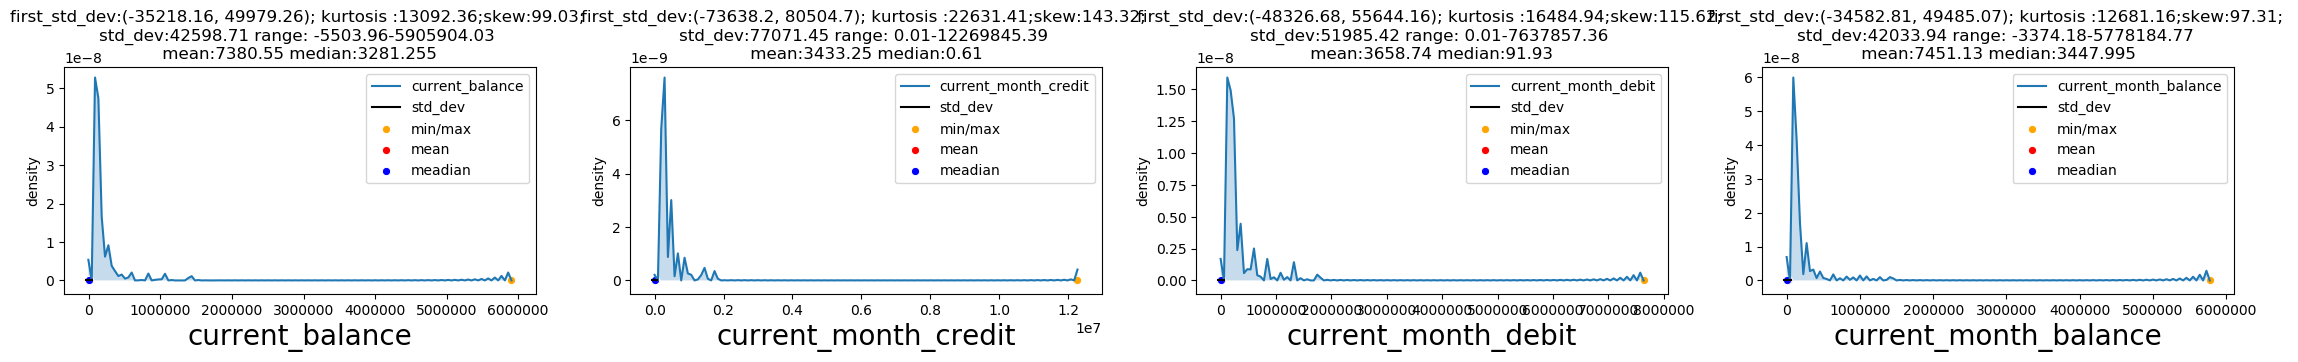

In [26]:
UVA(data,current_month)

### Summary
* value of skewness and kurtosis for all 4 of these plots is large. Outliers/Exterem values are presents.
* median of both current month credit and debit cleraly is much lower and given 
that range has no negative value, it implies       there a lot of customer with very low no of transcations with the bank

### Need to remove outlier to visualize these plots (just to visualize)
Outlier will be removed in further stage

In [27]:
## standard deviation factor
factor = 1

## copying_current_month 
cm_data = data[current_month]

## filtering using standard deviation (not considering observation > factor*standard deviation)

cm_data = cm_data[cm_data['current_balance'] < factor*cm_data['current_balance'].std()]
cm_data = cm_data[cm_data['current_month_credit'] < factor*cm_data['current_month_credit'].std()]
cm_data = cm_data[cm_data['current_month_debit'] < factor*cm_data['current_month_debit'].std()]
cm_data = cm_data[cm_data['current_month_balance'] < factor*cm_data['current_month_balance'].std()]

print(f"no of delted row:{len(data[current_month])-len(cm_data)}")

no of delted row:9498


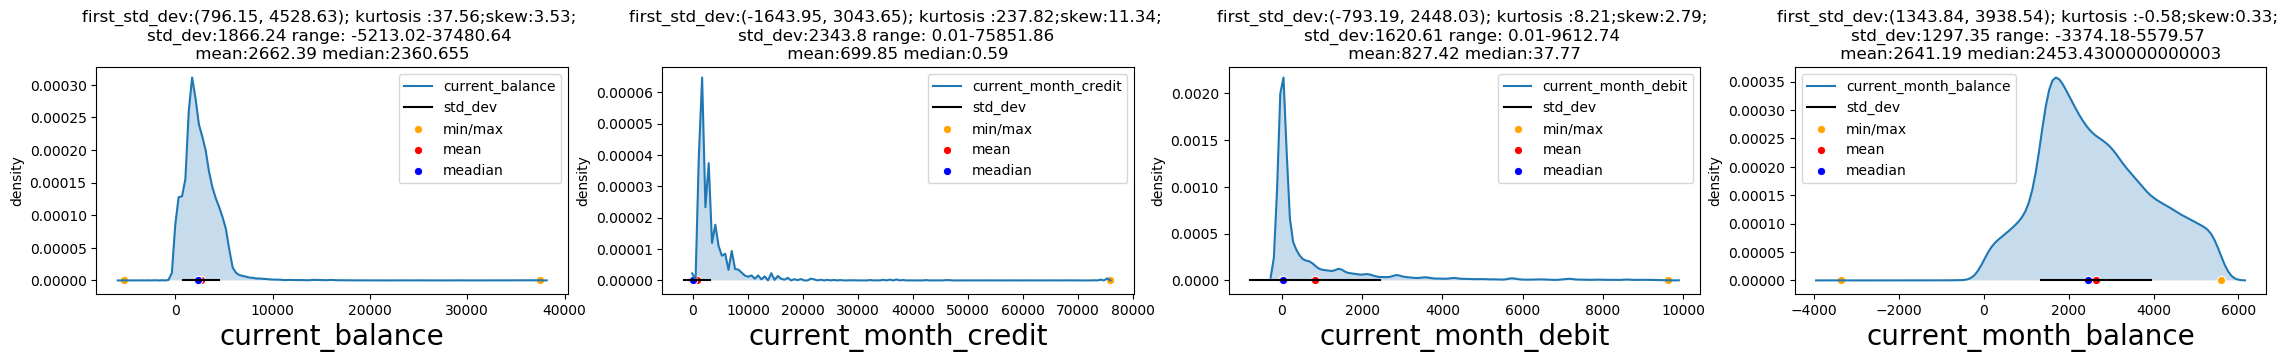

In [28]:
UVA(cm_data,current_month)

#### Summary of current)month 
1. After Removing extreme/outliers plots arestill very skewed with a lot of values concentrated to lower balances/credit/debit.


### Things to investigate further down
1. Is there any common trait/relation between the customers who are performing high transaction credit/debits?
2. Customers who are performing high amount of transactions, are they doin it every month?

### Previous_month

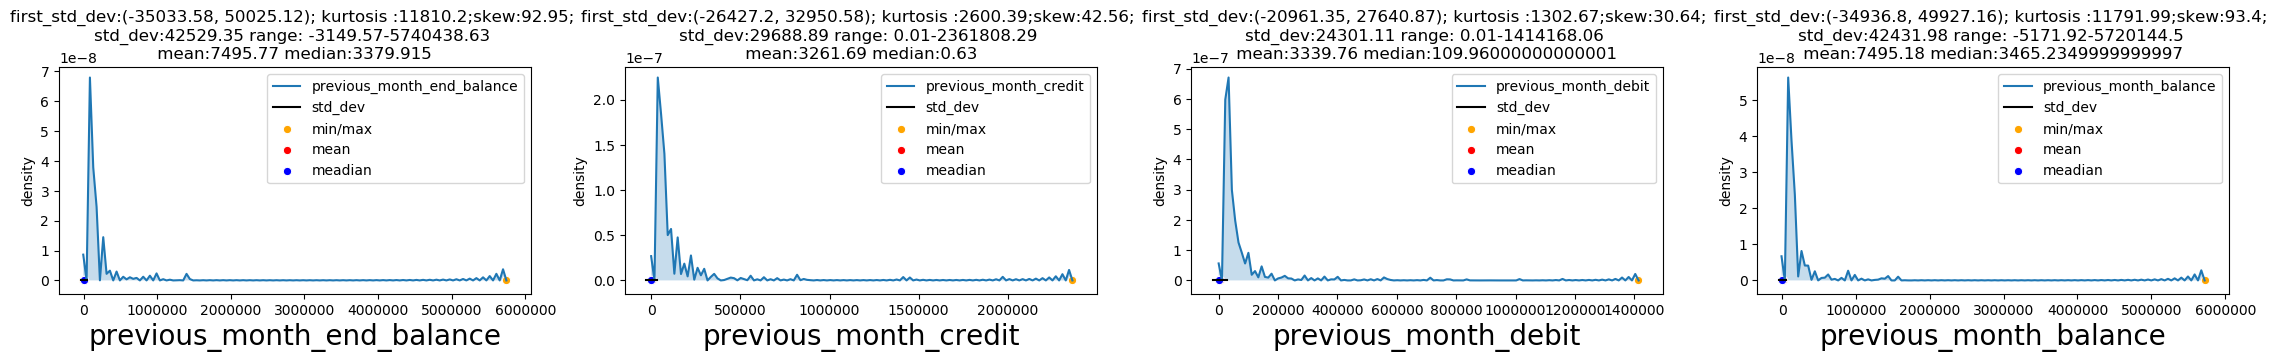

In [29]:
UVA(data,prev_month)

### Summary of previous_month
This looks very similiar to current_month.Most of the customers perform low amount transactions.

### Prev_quaters

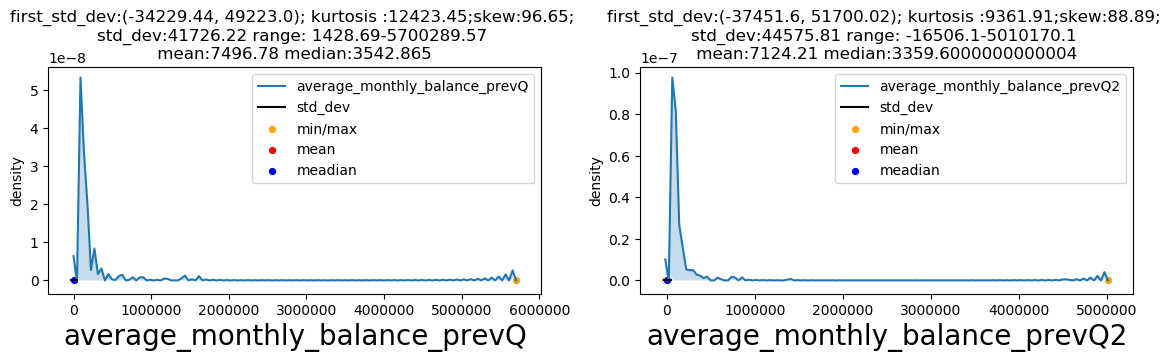

In [30]:
UVA(data,prev_quater)

### Summary of Prev_quaters
The general trend still follows,it is cruical that we find out if there is any common trait between the customers doing high amount of transcations.

### Futher phase of EDA after that Model Training --> cross validation --> fine tune --> Test Prediction still left to be done.